# TensorFlow 官方教程-基本图像处理 练习


## 对服装图像进行分类

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.18.0


## 导入 Fashion MNIST 数据集

Fashion MNIST 包含了 10个衣物类别的70,000个灰度图像，分辨率为28x28

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images,train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'] # save the name

In [4]:
train_images.shape
len(train_labels)
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [5]:
test_images.shape
len(test_labels)

10000

## 预览数据

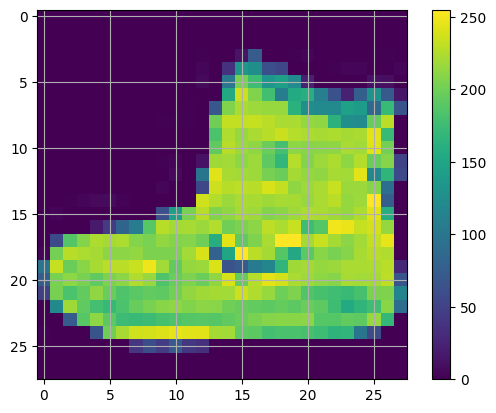

In [6]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid()
plt.show()

## 数据预处理
将像素值从[0,255]缩小至[0,1]之间

In [7]:
train_images = train_images/255.0
test_images = test_images/255.0

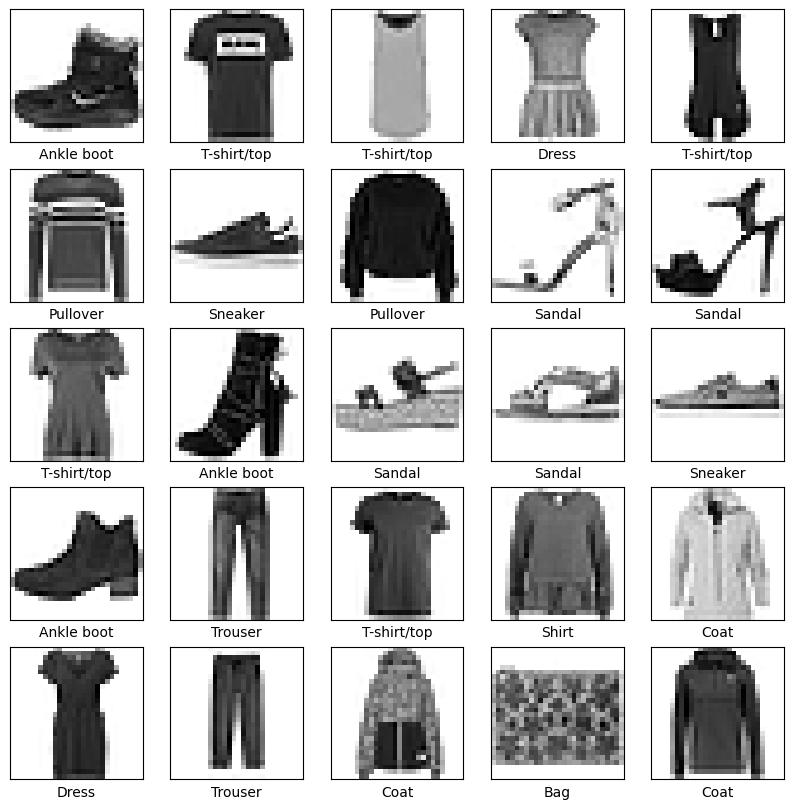

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([]) #用于覆盖x坐标轴的值
    plt.yticks([]) 
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]]) 
plt.show()

## 构建模型
配置模型结构，然后编译模型

In [18]:
from tensorflow.keras.layers import Flatten, Dense
model =  tf.keras.Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128,activation='relu'),
    Dense(10)
])

C:\Users\ChenHao\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Flatten()将图像从二维数组转换为一维数组，格式化数据。
Dense() 全连接层用来学习前一层的特征，第一层有128个节点，第二层返回10个小数数组，来预测当前图像属于哪一个类。


**编译模型**

配置 优化器，损失函数，与优化指标 （metrics）

In [20]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

## 训练模型

In [25]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9627 - loss: 0.0981
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9618 - loss: 0.1018
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9622 - loss: 0.0996
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9639 - loss: 0.0979
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9625 - loss: 0.0999
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9644 - loss: 0.0932
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9654 - loss: 0.0926
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9668 - loss: 0.0907
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9667 - loss: 0.0889
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9671 - loss: 0.0873


当测试集的准确率随训练次数增加而逐渐增加且达到一个峰值后，停滞不前或开始下降表示出现过拟合

**评估**

比较模型在测试集上的表现：

In [29]:
test_loss, test_acc = model.evaluate(test_images,test_labels, verbose=2)
print('\n Test accuracy:', test_acc)

313/313 - 0s - 1ms/step - accuracy: 0.8865 - loss: 0.5460

 Test accuracy: 0.8865000009536743


## 预测图像

In [31]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])


In [35]:
predictions = probability_model(test_images)
predictions[0]
np.argmax(predictions[0])

np.int64(9)

画出对各类预测的准确率

In [47]:
def plot_image(i, prediction_array, true_label, img):
    '''
    绘制图像以及是否准确预测
    成功预测为绿色，错误预测为红色 
    '''
    true_label, img = true_label[i],img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img,cmap=plt.cm.binary)
    
    predicted_label = np.argmax(prediction_array)
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel("{}{:2.0f}%({})".format(class_names[predicted_label],100*np.max(prediction_array),class_names[true_label]),color=color)

def plot_value_array(i, predictions_array, true_label):
    ''' 
    绘制模型预测图像的各个类的概率
    '''
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')
    

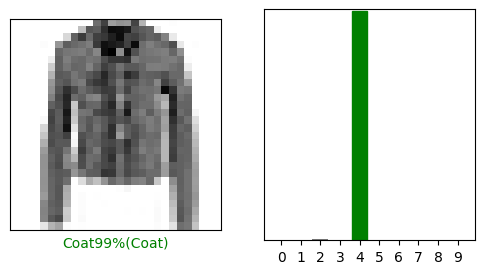

In [48]:
i =10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i],test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

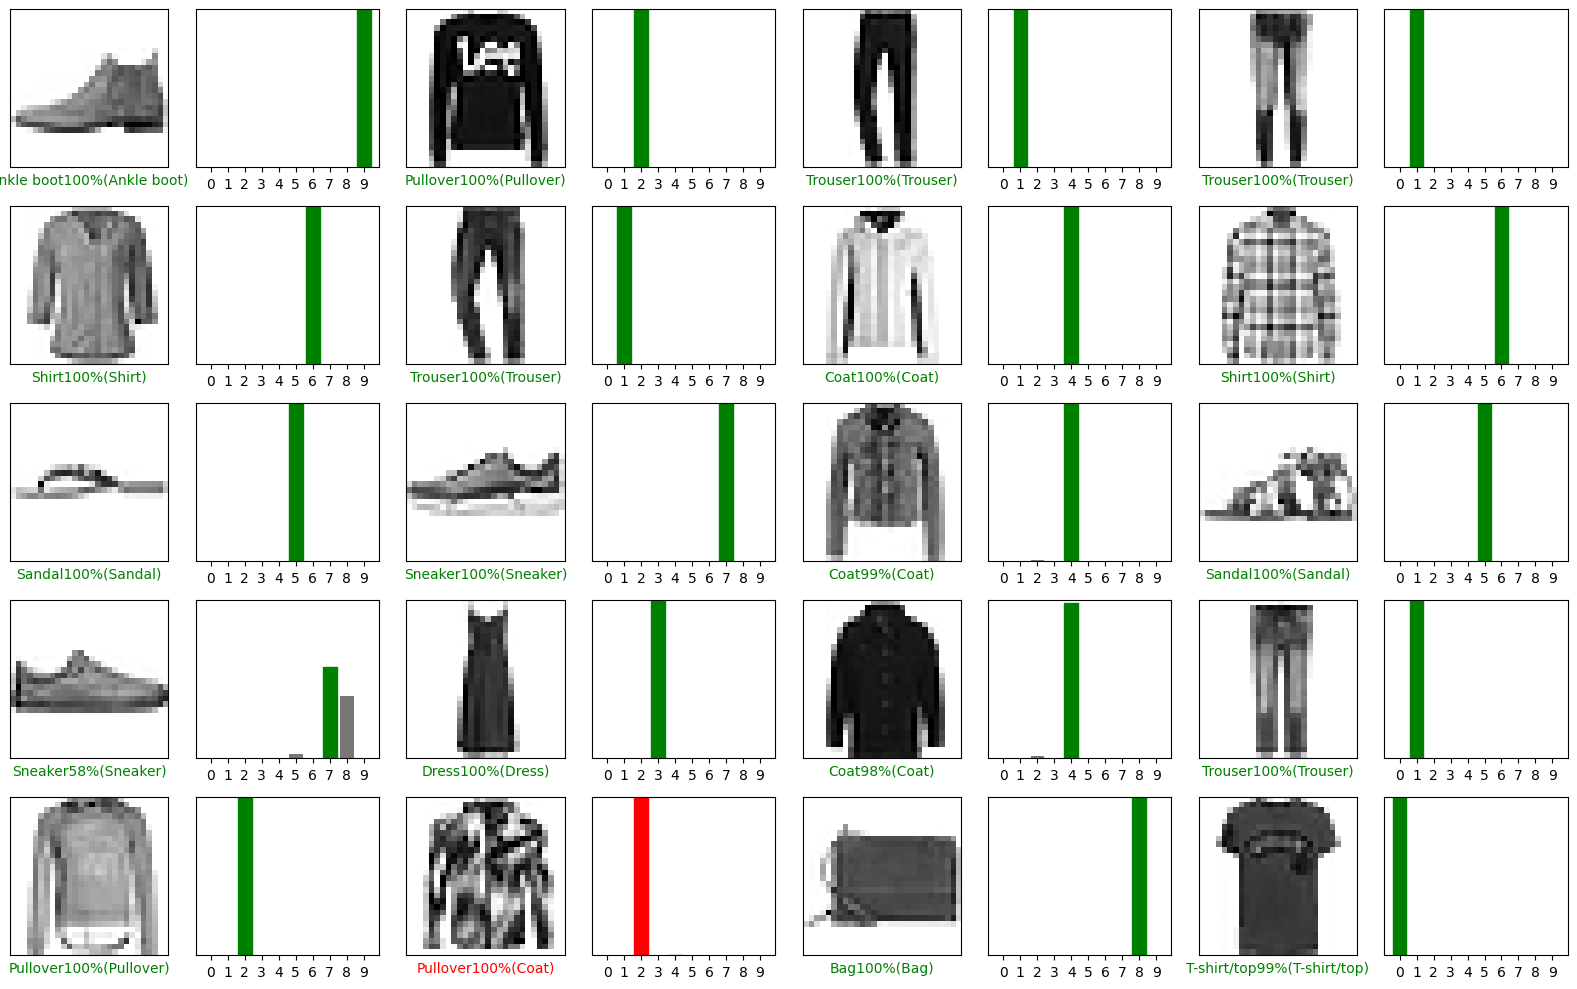

In [53]:
num_rows = 5
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(4*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i,predictions[i], test_labels, test_images)
    plt.subplot(num_rows,2*num_cols,2*i+2)
    plot_value_array(i,predictions[i], test_labels)
plt.tight_layout()
plt.show()


## 对单个图像进行预测

In [55]:
img = test_images[1]
img.shape

(28, 28)

tf.keras 可同时对一批或一组样本进行预测，所以只接受三维的数组，虽然只有一个图像，但也需要将起拓展为列表

In [ ]:
img = np.expand_dims(img,0)
img.shape


(1, 28, 28)

对单个图像进行预测

In [58]:
prediction_single = probability_model(img)
prediction_single

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[1.4710731e-06, 2.4673679e-26, 9.9979514e-01, 3.1748049e-26,
        2.0267746e-04, 1.2563209e-25, 6.7719674e-07, 2.8540064e-35,
        2.3275984e-33, 0.0000000e+00]], dtype=float32)>

2


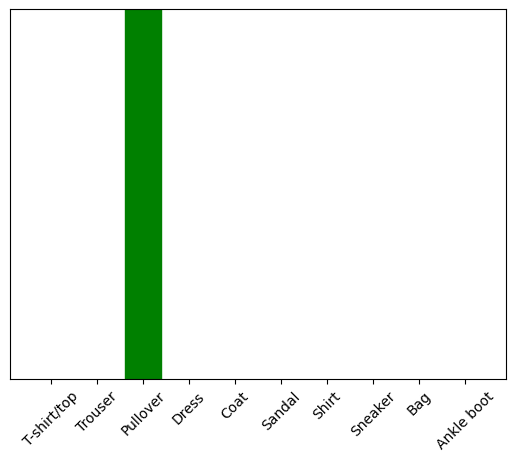

In [61]:
plot_value_array(1,prediction_single[0],test_labels)
_ = plt.xticks(range(10),class_names,rotation=45)
plt.show
print(np.argmax(prediction_single))

## 参考：[基本图像分类](https://www.tensorflow.org/tutorials/keras/classification?hl=zh-cn)